# Exploring the Weather in Athens
---

> *Practical Data Science*  
> *MSc in Data Science, Department of Informatics*  
> *Athens University of Economics and Business*

<p style='text-align: justify;'>Athens, Greece boasts a Mediterranean climate characterized by distinct seasons and a unique blend of climatic influences. Summers in Athens, spanning from June to August, are renowned for their scorching temperatures, with daytime highs often exceeding 30°C (86°F) and plenty of sunshine. This hot and dry season is a hallmark of Mediterranean climates and is attributed to the dominance of the Azores High, a high-pressure system settling over the Mediterranean. In contrast, the winter months from December to February usher in a mild, relatively wet period with temperatures typically ranging from 10°C to 15°C (50°F to 59°F). Rainfall becomes more frequent during this season, nourishing the landscape, although occasional light snowfall can grace the surrounding mountains.</p>

<p style='text-align: justify;'>Athens' climate is intricately influenced by its geography, with the city's proximity to the Aegean Sea playing a crucial role in moderating temperature extremes. Additionally, the surrounding mountains, including Parnitha, Penteli, and Hymettus, have a significant impact, shielding the city from extreme weather patterns and shaping local wind circulation. The Meltemi winds, dry north-northeast gusts from the Aegean Sea, make their presence felt during summer, providing both respite from the heat and occasionally stirring up dust. Furthermore, the topographical variations in elevation, from the city's low-lying areas to the higher altitudes of nearby mountain ranges, contribute to temperature differences between Athens and its environs, particularly in winter when cooler air can be trapped in valleys. These intertwined factors give Athens its unique climatic character, attracting visitors with its pleasant weather for most of the year, while cautioning those who venture during the summer months to brace for the intense heat.</p>


In this project we will explore the weather in Athens over a period of more than 50 years (1955-2020).

## Introduction <a id='introduction'></a>

### *Libraries* <a id='libraries'></a>

* At first we import the necessary libraries to conduct the analysis
* Then after downloading the data from the specified sources we import them using pandas
* Since the attributes for each entry in the data from the Hellenic National Observatory do not have headers we proceed to define them during the import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### *Datasets* <a class='anchor' id='Datasets'></a>

We will work with data covering the period from 1955 to 2020. The data will be obtained from two sources:

- The [National Oceanic and Atmospheric Administration's National Centers for Environmental Information (NOAA)](https://www.ncdc.noaa.gov/cdo-web/search)
- As we focus on Athens, we will use the data from the Hellenikon weather station
- The [Hellenic Data Service (HDS)](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f), which covers only the period from 2010-2019. This dataset will be uset as an alternative, to fill in any missing values.

### *NOAA* <a class='anchor' id='noaa'></a>

Each record of the ***NOAA*** dataset consists of all the observations available for a given station-day:
   - **STATION**: The station identification code
   - **NAME**: The name of the station (usually city or airport name)
   - **LATITUDE**: The latitude of the station
   - **LONGITUDE**: The longitude of the station
   - **ELEVATION**: The elevation above mean sea level (tenths of meters)
   - **DATE**: The year of the record (yyyy-MM-dd)
   - **PRCP**: Precipitation (mm)
   - **SNWD**: Snow depth (mm)
   - **TAVQ**: Average temperature (°C)
   - **TMAX**: Maximum temperature (°C)
   - **TMIN**: Minimum temperature (°C)

### *HDS* <a class='anchor' id='hds'></a>

Each record of the ***HDS*** dataset consists of 14 observations available for a given station-day:
- the date (yyyy-MM-dd)
- the mean, maximum and minimum temperature (°C)
- the mean, maximum and minimum humidity (%)
- the mean, maximum and minimum atmospheric pressure (hPa)
- the daily rainfall (mm)
- the mean wind speed, dominant wind direction and wind gust (km/h)

In [2]:
#File Names
noaa_file = "data/2757782.csv"
hellenic_file = "data/athens.csv"

In [3]:
#Datasets import
noaa_data = pd.read_csv(noaa_file, parse_dates=['DATE'])
hds_data = pd.read_csv(hellenic_file, header = None, names = ['DATE','mean_temp','max_temp','min_temp'
                                                            ,'mean_humid','max_humid','min_humid'
                                                            ,'mean_atm','max_atm','min_atm','sum_rain'
                                                            ,'mean_wndvel','wind_dir','max_wndvel']
                     ,parse_dates=['DATE'])

##### *At First we are going to explore the NOAA Dataset*

In [4]:
noaa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          23251 non-null  object        
 1   NAME             23251 non-null  object        
 2   LATITUDE         23251 non-null  float64       
 3   LONGITUDE        23251 non-null  float64       
 4   ELEVATION        23251 non-null  float64       
 5   DATE             23251 non-null  datetime64[ns]
 6   PRCP             22773 non-null  float64       
 7   PRCP_ATTRIBUTES  22773 non-null  object        
 8   SNWD             30 non-null     float64       
 9   SNWD_ATTRIBUTES  30 non-null     object        
 10  TAVG             20940 non-null  float64       
 11  TAVG_ATTRIBUTES  20940 non-null  object        
 12  TMAX             22307 non-null  float64       
 13  TMAX_ATTRIBUTES  22307 non-null  object        
 14  TMIN             22418 non-null  float

In [5]:
noaa_data.shape

(23251, 16)

In [6]:
#check for missing values
noaa_data.isna().sum()

STATION                0
NAME                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
DATE                   0
PRCP                 478
PRCP_ATTRIBUTES      478
SNWD               23221
SNWD_ATTRIBUTES    23221
TAVG                2311
TAVG_ATTRIBUTES     2311
TMAX                 944
TMAX_ATTRIBUTES      944
TMIN                 833
TMIN_ATTRIBUTES      833
dtype: int64

##### *Checking for outliers*

- The attributes of importance are ***PRCP*** and ***TAVG***
- Specifically, we will check whether they contain any values that fall out of the ordinary

In [7]:
print(f'PRCP Max: {noaa_data.PRCP.max()}')
print(f'PRCP Min: {noaa_data.PRCP.min()}')
print(f'TAVG Max: {noaa_data.TAVG.max()}')
print(f'TAVG Min: {noaa_data.TAVG.min()}')

PRCP Max: 142.0
PRCP Min: 0.0
TAVG Max: 34.8
TAVG Min: -2.0


In [8]:
#check top 10 rainy days
noaa_data[['DATE', 'PRCP', 'TMAX', 'TMIN']].sort_values(by='PRCP', ascending=False).head(10)

,DATE,PRCP,TMAX,TMIN
15790,1998-03-26,142.0,8.4,4.8
16147,1999-03-18,98.5,12.0,6.4
17110,2001-11-05,96.8,14.6,9.4
16029,1998-11-20,96.3,16.4,12.2
11778,1987-04-01,92.3,13.0,8.2
18590,2005-11-24,88.1,NaN,12.2
20485,2011-02-04,83.3,9.0,6.0
10974,1985-01-17,81.6,8.8,5.6
8701,1978-10-28,80.9,16.8,7.4
13489,1991-12-07,80.2,12.2,3.4


- Although the maximum rainfall appears to be extreme, we can see that it is only due to a single day
- There are rare occasions where this can happen in a span of 50 year
- Therefore we conclude that there are no outliers present in the dataset

##### *Now we are going to explore the HDS Dataset*

In [9]:
hds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         3652 non-null   datetime64[ns]
 1   mean_temp    3652 non-null   object        
 2   max_temp     3652 non-null   object        
 3   min_temp     3652 non-null   object        
 4   mean_humid   3652 non-null   float64       
 5   max_humid    3652 non-null   int64         
 6   min_humid    3652 non-null   int64         
 7   mean_atm     3652 non-null   float64       
 8   max_atm      3652 non-null   float64       
 9   min_atm      3652 non-null   float64       
 10  sum_rain     3652 non-null   float64       
 11  mean_wndvel  3652 non-null   float64       
 12  wind_dir     3652 non-null   object        
 13  max_wndvel   3652 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 399.6+ KB


In [10]:
hds_data.shape

(3652, 14)

* Looking at the data types we can see that we need to convert the following attributes to numeric

    * mean_temp (average temperature)
    * max_temp  (maximum temperature)
    * min_temp  (minimum temperature)

In [11]:
hds_data.mean_temp = pd.to_numeric(hds_data.mean_temp, errors = 'coerce')
hds_data.min_temp = pd.to_numeric(hds_data.min_temp, errors = 'coerce')
hds_data.max_temp = pd.to_numeric(hds_data.max_temp, errors = 'coerce')

In [12]:
# check for missing values
hds_data.isna().sum()

DATE           0
mean_temp      3
max_temp       3
min_temp       3
mean_humid     0
max_humid      0
min_humid      0
mean_atm       0
max_atm        0
min_atm        0
sum_rain       0
mean_wndvel    0
wind_dir       0
max_wndvel     0
dtype: int64

In [13]:
# Find the records with missing values
hds_data[hds_data.mean_temp.isna() | hds_data.max_temp.isna() | hds_data.min_temp.isna()]

,DATE,mean_temp,max_temp,min_temp,mean_humid,max_humid,min_humid,mean_atm,max_atm,min_atm,sum_rain,mean_wndvel,wind_dir,max_wndvel
514,2011-05-30,NaN,NaN,NaN,64.3,81,40,1016.2,1017.3,1014.7,11.6,2.1,NNW,7.5
1235,2013-05-20,NaN,NaN,NaN,55.7,72,43,1013.8,1014.7,1012.6,0.0,2.2,SSW,6.8
2012,2015-07-06,NaN,NaN,NaN,39.4,54,30,1016.4,1017.5,1015.2,0.0,5.9,NNE,13.2


In [14]:
# Check if the records exist in the NOAA Dataset
noaa_data[noaa_data.DATE.isin(hds_data[hds_data.mean_temp.isna() | hds_data.max_temp.isna() | hds_data.min_temp.isna()].DATE)]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
20600,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,2011-05-30,0.0,",,S",NaN,NaN,20.6,"H,,S",24.4,",,S",16.2,",,S"
21270,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,2015-07-06,0.0,",,S",NaN,NaN,27.8,"H,,S",33.3,",,S",22.2,",,S"


- Two of the records also appear in the ***NOAA*** dataset, while one of them is missing
- All three contain values in the columns of interest
- Therefore, we will keep all of them

##### *Check if there are any dates missing from 01/01/2010 to 31/12/2019*

In [15]:
len(pd.date_range(start = '2010-01-01', end = '2019-12-31').difference(noaa_data.DATE))

853

- As we can see there are 853 missing dates in the NOAA dataset
- We will merge the ***NOAA*** and ***HDS*** Datasets in order to fill in some of the missing values
- We will use outer join since we want to get all unique dates available

In [16]:
# join the dataframes
merged_data = pd.merge(noaa_data, 
                       hds_data,
                       on='DATE',
                       how='outer').sort_values(by='DATE').reset_index(drop=True)

# preview
merged_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,...,mean_humid,max_humid,min_humid,mean_atm,max_atm,min_atm,sum_rain,mean_wndvel,wind_dir,max_wndvel
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-02,2.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-03,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-04,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-05,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24104 entries, 0 to 24103
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          23251 non-null  object        
 1   NAME             23251 non-null  object        
 2   LATITUDE         23251 non-null  float64       
 3   LONGITUDE        23251 non-null  float64       
 4   ELEVATION        23251 non-null  float64       
 5   DATE             24104 non-null  datetime64[ns]
 6   PRCP             22773 non-null  float64       
 7   PRCP_ATTRIBUTES  22773 non-null  object        
 8   SNWD             30 non-null     float64       
 9   SNWD_ATTRIBUTES  30 non-null     object        
 10  TAVG             20940 non-null  float64       
 11  TAVG_ATTRIBUTES  20940 non-null  object        
 12  TMAX             22307 non-null  float64       
 13  TMAX_ATTRIBUTES  22307 non-null  object        
 14  TMIN             22418 non-null  float

##### *Fill in the missing values*

- We can see that we have 3164 missing values in the average temperature and 1331 missing values in the precipitaion
- We will replace these values from the corresponding ones (if they exist) from HDS
- Finally we end up with reduced missing values in both columns 

In [18]:
#Number of Missing Values Before the Update
Temp_Before = merged_data.TAVG.isna().sum()
Prcp_Before = merged_data.PRCP.isna().sum()

print(f'Average Temperature Missing Values: {Temp_Before}')
print(f'Precipitation Missing Values: {Prcp_Before}')

Average Temperature Missing Values: 3164
Precipitation Missing Values: 1331


In [19]:
#Update the NOAA missing values from HDS
merged_data['TAVG'].fillna(merged_data['mean_temp'],inplace=True)
merged_data['PRCP'].fillna(merged_data['sum_rain'],inplace=True)

In [20]:
#Number of Missing Values Before the Update
Temp_After = merged_data.TAVG.isna().sum()
Prcp_After = merged_data.PRCP.isna().sum()

print(f'Average Temperature Missing Values: {Temp_After}')
print(f'Precipitation Missing Values: {Prcp_After}')

Average Temperature Missing Values: 2312
Precipitation Missing Values: 376


## Deviation of Summer Temperatures <a class='anchor' id='summer_temperatures'></a>

- The Hellenic National Meteorological Service has published a report on extreme weather events for 2020, available [here](http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf)
- In page 7 of the report there is a graph showing the mean summer temperature deviation from a baseline of 1971-2000
- We will create our own version of the graph, using a baseline of 1974-1999
- The line that runs through the graph is the 10-year rolling avarege of the deviation from the mean
- What is your interpretation of the figure?
---

* At first we select the data only for the summer months (June,July,August)
* Then we calculate the average summer temperature for each year

In [21]:
#isolate summer months
summer_data = merged_data.loc[(merged_data.DATE.dt.month.isin([6,7,8]))]

In [22]:
#dataframe with grouped data
grouped_data = summer_data.groupby([summer_data.DATE.dt.year])['TAVG'].mean().reset_index()

* In order to find the baseline temperature we do the following:
    * Select the summer months for the period between 1974 and 1999
    * Calculate the average temperature for the specified period

In [23]:
#calculate and display mean temperature for the baseline temperature
meanBase_temp = merged_data.loc[(merged_data.DATE >= '1974-01-01') & (merged_data.DATE < '2000-01-01') 
                               & (merged_data.DATE.dt.month.isin([6,7,8]))].TAVG.mean()
meanBase_temp

26.23214585079631

* Then we compute:
    * The difference between the mean yearly summer temperature and the baseline
    * The 10 year rolling average of the specified difference

In [24]:
#calculate temperature difference
grouped_data['diff'] = grouped_data['TAVG'] - meanBase_temp

#calculate the rolling average
grouped_data['rolling_avg'] = grouped_data['diff'].rolling(10, min_periods=1).mean()
grouped_data

,DATE,TAVG,diff,rolling_avg
0,1955,NaN,NaN,NaN
1,1956,NaN,NaN,NaN
2,1957,28.091935,1.859790,1.859790
3,1958,27.081522,0.849376,1.354583
4,1959,NaN,NaN,1.354583
...,...,...,...,...
61,2016,28.154348,1.922202,1.953902
62,2017,28.088043,1.855898,1.936332
63,2018,27.436957,1.204811,1.863180
64,2019,28.034783,1.802637,1.927963


* Finally we plot the difference and the rolling average we calculated above

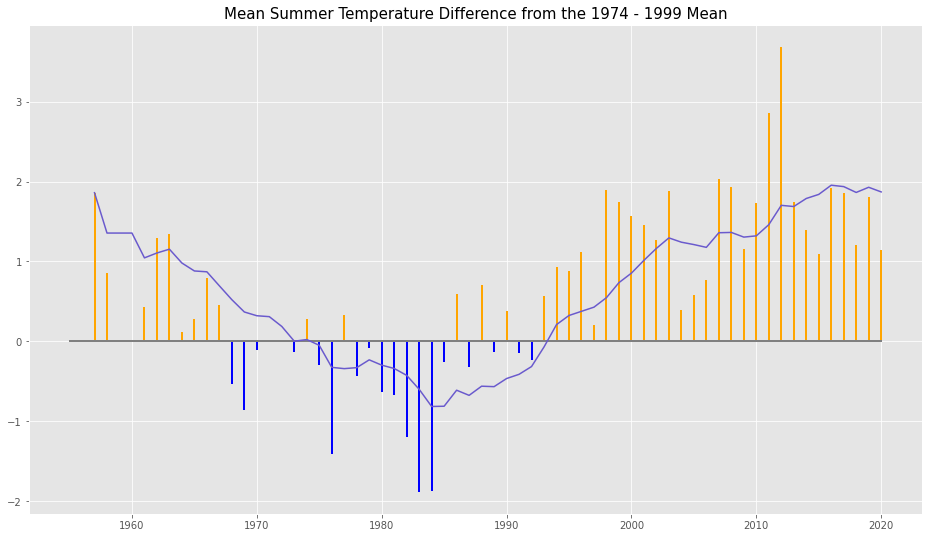

In [25]:
# Create a figure with a specified size
plt.figure(figsize=(16, 9))

# Create a stem plot (stemlines) to represent temperature differences
# The 'markerfmt' parameter is set to ' ' to hide markers on the stemlines
(markers, stemlines, baseline) = plt.stem(grouped_data.DATE, grouped_data.TAVG - meanBase_temp, markerfmt=' ')

# Customize the appearance of the baseline (horizontal lines) and stemlines
plt.setp(baseline, color="grey", linewidth=2) 

# Set stemline color based on the 'diff' column conditionally
plt.setp(stemlines, color=(grouped_data['diff'] > 0).map({True: 'orange', False: 'blue'}), linewidth=2)

# Create a line plot using Seaborn to represent rolling average data
sns.lineplot(x='DATE', y='rolling_avg', color='slateblue', data=grouped_data)

# Set plot title and axis labels
plt.title("Mean Summer Temperature Difference from the 1974 - 1999 Mean", fontsize=15)
plt.xlabel("")  
plt.ylabel("")

plt.show()

- As we can see from the graph,since the mid 1990s, there is a steady increase in the average summer temperature compared to the baseline period of 1974 - 1999.
- This highlights one of the effects that Climate Change has in Athens, which is having increasingly warmer summers. 

## Evolution of Daily Temperatures <a class='anchor' id='daily_temperatures'></a>

We will get the average temperate for each year for the full period from 1955 to 2020. We will then create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a 30 days rolling average. The lines are colored from light orange to dark orange, progressing through the years in ascending order.

On that plot we will overlay a black line showing the average daily temperature for the baseline period of 1974-1999. The line will also be smoothed usng a 30 years rolling average. What is your interpretation of the figure?

---

* At first we create three more columns that contain:
    * The Year and the Month for each entry date
    * The 30 day rolling average for the average daily temperature

In [26]:
#column creation
merged_data['Year'] = merged_data.DATE.dt.year
merged_data['Month'] = merged_data.DATE.dt.month
merged_data['Day'] = merged_data.DATE.dt.dayofyear
merged_data['DayRolling_Avg'] = merged_data['TAVG'].rolling(30, min_periods=1).mean()
merged_data.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,...,max_atm,min_atm,sum_rain,mean_wndvel,wind_dir,max_wndvel,Year,Month,Day,DayRolling_Avg
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1955,1,1,NaN
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-02,2.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1955,1,2,NaN
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-03,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1955,1,3,NaN


- We create a pivot table from the merged dataset
- Each row represents a single day in a year
- Each column represents every year that is present 
- We create a dataframe from those records

In [27]:
grid = pd.pivot_table(data=merged_data, 
                                index=merged_data.DATE.dt.dayofyear,
                                columns='Year',
                                values='TAVG')

In [28]:
fig_data = pd.DataFrame(grid.to_records())
fig_data

,DATE,1957,1958,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,NaN,12.1,12.0,12.9,15.1,9.2,11.2,13.3,11.4,...,9.9,10.2,11.3,9.8,4.4,3.8,6.0,11.3,8.3,8.4
1,2,NaN,11.8,12.2,13.7,13.9,9.3,11.8,12.2,11.2,...,11.5,9.5,10.9,11.3,4.5,7.9,8.4,13.7,7.4,7.1
2,3,NaN,12.1,13.6,16.8,13.2,7.6,14.2,13.2,13.1,...,11.0,9.7,11.6,11.1,5.5,11.5,11.1,11.5,6.4,8.9
3,4,NaN,10.3,13.8,11.7,16.4,10.4,14.9,13.0,14.9,...,9.8,11.3,11.2,10.8,11.1,13.4,11.8,9.6,5.7,10.4
4,5,NaN,8.5,15.3,8.8,15.0,8.7,11.8,7.4,13.9,...,9.3,11.1,11.3,11.8,6.2,17.2,13.2,10.4,3.9,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.8,12.4,16.4,14.3,12.4,14.0,15.1,9.0,15.4,...,9.4,13.2,13.3,11.9,11.8,10.8,14.3,8.8,8.6,16.6
362,363,11.9,13.5,17.5,13.3,8.8,12.1,16.7,10.4,13.5,...,8.6,13.3,13.0,14.2,12.4,7.2,12.7,10.8,5.9,14.8
363,364,15.7,11.2,14.1,16.5,8.4,11.8,16.6,9.9,12.6,...,11.8,12.1,12.2,5.1,9.9,3.9,11.3,10.6,4.2,16.3
364,365,15.8,9.0,13.8,16.6,8.8,12.9,17.1,11.2,13.4,...,11.3,10.3,10.4,4.9,3.4,3.6,9.7,9.7,5.9,16.4


* We calculate the average daily temperature for the period 1974 - 1999
* Columns 15 - 41 represent those years in the dataset

In [29]:
fig_data['Mean'] = fig_data.iloc[:, 15:41].mean(axis=1)
fig_data

,DATE,1957,1958,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Mean
0,1,NaN,12.1,12.0,12.9,15.1,9.2,11.2,13.3,11.4,...,10.2,11.3,9.8,4.4,3.8,6.0,11.3,8.3,8.4,10.365385
1,2,NaN,11.8,12.2,13.7,13.9,9.3,11.8,12.2,11.2,...,9.5,10.9,11.3,4.5,7.9,8.4,13.7,7.4,7.1,10.707692
2,3,NaN,12.1,13.6,16.8,13.2,7.6,14.2,13.2,13.1,...,9.7,11.6,11.1,5.5,11.5,11.1,11.5,6.4,8.9,10.207692
3,4,NaN,10.3,13.8,11.7,16.4,10.4,14.9,13.0,14.9,...,11.3,11.2,10.8,11.1,13.4,11.8,9.6,5.7,10.4,9.634615
4,5,NaN,8.5,15.3,8.8,15.0,8.7,11.8,7.4,13.9,...,11.1,11.3,11.8,6.2,17.2,13.2,10.4,3.9,9.6,9.919231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.8,12.4,16.4,14.3,12.4,14.0,15.1,9.0,15.4,...,13.2,13.3,11.9,11.8,10.8,14.3,8.8,8.6,16.6,10.261538
362,363,11.9,13.5,17.5,13.3,8.8,12.1,16.7,10.4,13.5,...,13.3,13.0,14.2,12.4,7.2,12.7,10.8,5.9,14.8,10.653846
363,364,15.7,11.2,14.1,16.5,8.4,11.8,16.6,9.9,12.6,...,12.1,12.2,5.1,9.9,3.9,11.3,10.6,4.2,16.3,11.011538
364,365,15.8,9.0,13.8,16.6,8.8,12.9,17.1,11.2,13.4,...,10.3,10.4,4.9,3.4,3.6,9.7,9.7,5.9,16.4,11.146154


* We plot the average daily temperature for each year by iterating through all the columns
* The lines are colored from light orange to dark orange, progressing through the years in ascending order
* The black line represents the baseline
* We format the x axis to contain the months instead of the day number

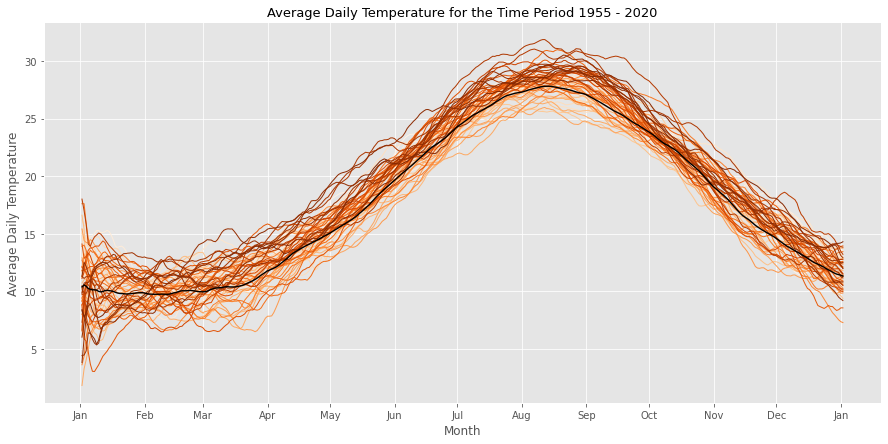

In [30]:
import matplotlib.dates as mdate

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Set the date locator and formatter for the x-axis
locator = mdate.MonthLocator()
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(fmt)

# Create a colormap for line colors
cm = plt.get_cmap('Oranges')

# Iterate through the columns
for index, colname in enumerate(fig_data.columns):
    if colname != 'DATE':
        # Calculate the rolling mean for the current column
        rolling_mean = fig_data[colname].rolling(30, min_periods=1).mean()
        
        # Determine the line color based on the colormap
        line_color = cm(index / (len(fig_data.columns) - 1))
        
        # Check if the column name is 'Mean' and set a thicker black line
        if colname == 'Mean':
            sns.lineplot(data=fig_data, x='DATE', y=rolling_mean, color='black', linewidth=1.4)
        else:
            sns.lineplot(data=fig_data, x='DATE', y=rolling_mean, color=line_color, linewidth=1)

# Set plot title, x-axis label, and y-axis label
plt.title("Average Daily Temperature for the Time Period 1955 - 2020", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Average Daily Temperature")

plt.show()

- The graph shows the daily temperature, for each year from 1955 to 2020, over the course of a year. The lines representing the years are coloured from light orange to dark orange, progressing through the years in ascending order.

- Again we can see that as we move towards more recent years the average daily temperatures registered across the whole year are becoming higher
- The effects of climate change here are even more aparent because we are looking at the whole year instead of just summer

### Q4: Extreme Temperature Events

Another measure used by climatologists is the number of extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value. We will deal with extreme heat events going 10% above the baseline. We will count the number of extreme temperature events per year, compared to the baseline 1974-1999. The vertical axis in our graph will be the percentage of extreme heat events calculated over the number of observations for each year. The grey line in the middle will be the average percentage of extreme temperature events of the baseline. The blue colour will be used for years in which the percentage is lower than the baseline; otherwise the colour will be orange. What is your interpretation of the figure?

---

* In order to find extreme heat events we need to calculate the average daily temperature for the baseline period
* Here we create a dataframe the contains the information above
* We rename the TAVG column in order to avoid confusion

In [31]:
#average daily temperature for the baseline period
day_base_temp = merged_data.loc[(merged_data.DATE >= '1974-01-01') 
                         & (merged_data.DATE < '2000-01-01')].groupby(['Day']).TAVG.mean().reset_index()
day_base_temp = day_base_temp.rename(columns={'TAVG':'MeanTAVG'})
day_base_temp

,Day,MeanTAVG
0,1,10.365385
1,2,10.707692
2,3,10.207692
3,4,9.634615
4,5,9.919231
...,...,...
361,362,10.261538
362,363,10.653846
363,364,11.011538
364,365,11.146154


* We merge the initial dataset with the above in order to get the expected temperature

In [32]:
#merge Dfs
merged_data = pd.merge(merged_data, 
               day_base_temp[['Day','MeanTAVG']], 
               how='inner',
               left_on=["Day"], right_on=["Day"])
merged_data.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,...,min_atm,sum_rain,mean_wndvel,wind_dir,max_wndvel,Year,Month,Day,DayRolling_Avg,MeanTAVG
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1955,1,1,NaN,10.365385
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1956-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1956,1,1,NaN,10.365385
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1957-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1957,1,1,NaN,10.365385


* Then we create the following two dataframes:
    * The first (obs) contains the number of valid observations we have per year
    * The second (extr) contains the number of extreme heat observations (10% higher from the average) per year

In [33]:
obs = merged_data.loc[(merged_data.TAVG.notna())].groupby(['Year']).size().reset_index()
obs.columns = obs.columns.map(str)
obs = obs.rename(columns={'0':'Count'})
obs

,Year,Count
0,1957,184
1,1958,365
2,1961,365
3,1962,365
4,1963,364
...,...,...
56,2016,366
57,2017,365
58,2018,365
59,2019,365


In [34]:
extr = merged_data.loc[(merged_data.TAVG >= merged_data.MeanTAVG * 1.1)].groupby(['Year']).size().reset_index()
extr.columns = extr.columns.map(str)
extr = extr.rename(columns={'0':'extr_events'})
extr

,Year,extr_events
0,1957,50
1,1958,134
2,1961,136
3,1962,154
4,1963,142
...,...,...
56,2016,158
57,2017,169
58,2018,168
59,2019,159


* We merge the two dataframes based on the year column
* We calculate the ratio of extreme heat events over the number of observations for each year in the column "Ratio"

In [35]:
extr_data = pd.merge(extr, 
               obs[['Year','Count']], 
               how='inner',
               left_on=["Year"], right_on=["Year"])
extr_data['Ratio'] = extr_data.extr_events / extr_data.Count
extr_data

,Year,extr_events,Count,Ratio
0,1957,50,184,0.271739
1,1958,134,365,0.367123
2,1961,136,365,0.372603
3,1962,154,365,0.421918
4,1963,142,364,0.390110
...,...,...,...,...
56,2016,158,366,0.431694
57,2017,169,365,0.463014
58,2018,168,365,0.460274
59,2019,159,365,0.435616


* Afterwards we calculate the average ratio for the baseline period of 1974 - 1999

In [36]:
base_ratio = extr_data.loc[(extr_data.Year >= 1974) & (extr_data.Year < 2000)].Ratio.mean()
base_ratio

0.2481314415207134

* Finally we plot the Ratios we calculated above
* The orange color indicates higher ratio of extreme heat events than the baseline
* On the opposite blue color indicates a lower ratio
* We acheive that by mapping the result of the comparison of the ratios to the colors

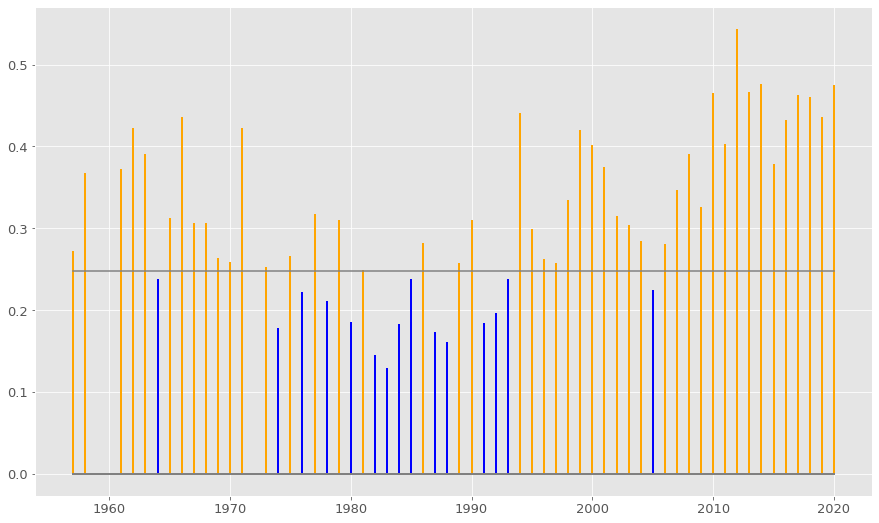

In [37]:
# Create a figure with a specified size
plt.figure(figsize=(15, 9))

# Create a stem plot (stemlines) to represent data points
(markers, stemlines, baseline) = plt.stem(extr_data.Year, extr_data.Ratio, markerfmt=' ')

# Customize the appearance of the baseline (horizontal lines) and stemlines
plt.setp(baseline, color="grey", linewidth=2)
plt.setp(stemlines, color=(extr_data.Ratio > base_ratio).map({True: 'orange', False: 'blue'}), linewidth=2)

# Create a horizontal line to represent the baseline ratio
sns.lineplot(x='Year', y=base_ratio, color='grey', data=extr_data)

# Customize x and y tick labels font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Remove x-axis and y-axis labels
plt.xlabel(None)
plt.ylabel(None)

plt.show()

- The graph shows the ratio of extreme temperature events to the number of available observations per year. The baseline period for defining an event as extreme or not is the period from 1974 to 1999 and the temperatures observed during this period.
- Here we can see that since the turning of the century the number of days with extreme heat observations is 10 - 15% higher that the baseline.
- This provides further evidence for Climate Change since not only the average temperature is higher (as we saw on the previous graph) but the severity of heat has also increased.

### Q5: Precipitation

Continuing the thread on extreme events, another consideration is rainfall. The weather may or may not be drying up. We are, however, interested in whether precipication becomes more intense over time.

To see that, we will count the overall rainfall over the year and the number of rainy days in each year. Then, by dividing the rainfall by the number of rainy days we will get an indication of whether we are getting rain in more concentrated bursts. We will then create a plot showing the ratio of rainfall over rainy days over the years. On the plot you will overlay the 10 years rolling average.What is your interpretation of the plot?

---

* To begin with we create the following two dataframes:
    * The first (rain_sum) contains the sum of rainfall for each year
    * The second (rain_count) contains the number of rainy days for each year

In [38]:
rain_sum = merged_data.groupby(['Year'])['PRCP'].sum().reset_index()
rain_sum

,Year,PRCP
0,1955,547.0
1,1956,281.3
2,1957,303.2
3,1958,350.0
4,1959,214.0
...,...,...
61,2016,261.6
62,2017,304.3
63,2018,380.2
64,2019,570.0


In [39]:
rain_count = merged_data.loc[(merged_data.PRCP > 0)].groupby(['Year']).size().reset_index()
rain_count.columns = rain_count.columns.map(str)
rain_count = rain_count.rename(columns={'0':'r_count'})
rain_count

,Year,r_count
0,1955,68
1,1956,52
2,1957,73
3,1958,68
4,1959,62
...,...,...
61,2016,42
62,2017,48
63,2018,55
64,2019,58


* Then we merge the two dataframes based on the year
* We calculate the ratio of rainfall over rainy days for each year

In [40]:
#merge Dfs
rain_data = pd.merge(rain_sum, 
               rain_count[['Year','r_count']], 
               how='inner',
               left_on=["Year"], right_on=["Year"])
rain_data['Ratio'] = rain_sum.PRCP / rain_count.r_count
rain_data

,Year,PRCP,r_count,Ratio
0,1955,547.0,68,8.044118
1,1956,281.3,52,5.409615
2,1957,303.2,73,4.153425
3,1958,350.0,68,5.147059
4,1959,214.0,62,3.451613
...,...,...,...,...
61,2016,261.6,42,6.228571
62,2017,304.3,48,6.339583
63,2018,380.2,55,6.912727
64,2019,570.0,58,9.827586


* At last we plot the calculated ratio along with a trend line showing the 10 year rolling average

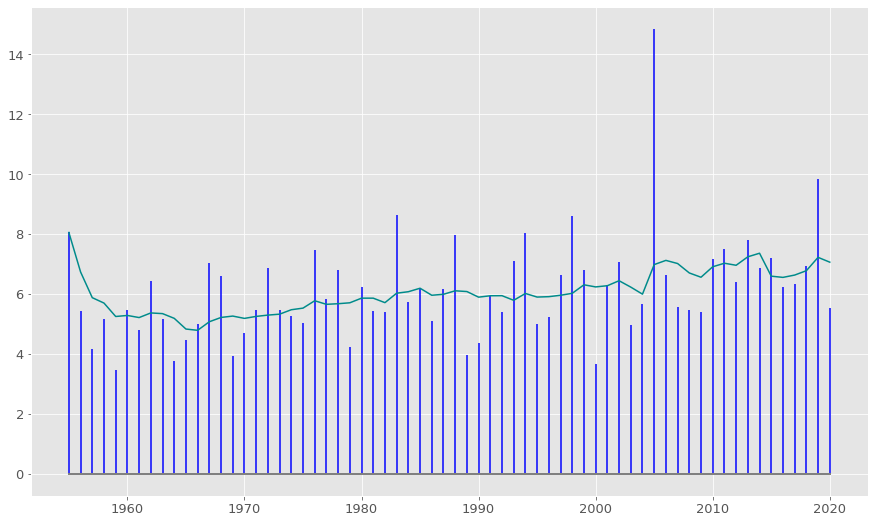

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(15, 9))

# Create a stem plot (stemlines) to represent data points
# The 'markerfmt' parameter is set to ' ' to hide markers on the stemlines
(markers, stemlines, baseline) = plt.stem(rain_data.Year, rain_data.Ratio, markerfmt=' ')

# Customize the appearance of the baseline (horizontal lines) and stemlines
plt.setp(baseline, color="grey", linewidth=2)  # Set baseline color and line width
plt.setp(stemlines, color="blue", linewidth=1.5)  # Set stemline color and line width

# Create a line to represent a rolling mean of the ratio of rainfall over rainy days
sns.lineplot(
    x='Year',
    y=rain_data.Ratio.rolling(10, min_periods=1).mean(),
    color='darkcyan',  # Line color
    data=rain_data
)

# Customize x and y tick labels font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Remove x-axis and y-axis labels
plt.xlabel(None)
plt.ylabel(None)

plt.show()

- This graph shows the volume of rainfall over rainy days for each year. To calculate this value, the total rainfall volume for the year is divided by the total number of rainy days in the year
- In this graph we can see that there is a slight increase in the rainfall per rainy days as we move towards the present
- Also we can see that we have some years that are outliers in a sense that they have many rainy days with high water volumes
- But the phenomenon seems to be more randomely distributed than the others we have seen before.